In [1]:
import cv2

from diploma.drawing import draw_images
from diploma.models import FaceRecONNX, FaceDetectorONNX
from diploma.utils import cosine_simularity, align_face

In [2]:
x1 = cv2.imread('E:\kbtu_courses\diploma_project\src\diploma\photos\Asyl_Big1.jpg')
x2 = cv2.imread('E:\kbtu_courses\diploma_project\src\diploma\photos\Asyl_Big2.jpg')
x3 = cv2.imread('E:\kbtu_courses\diploma_project\src\diploma\photos\Asyl_Big3.jpg')
x4 = cv2.imread('E:\kbtu_courses\diploma_project\src\diploma\photos\Rusya_Big1.jpg')
x5 = cv2.imread('E:\kbtu_courses\diploma_project\src\diploma\photos\Rusya_Big2.jpg')

In [3]:
detector = FaceDetectorONNX("E:\kbtu_courses\diploma_project\src\diploma\models\detector\weights\model_detector.onnx")
recog = FaceRecONNX('E:/kbtu_courses/diploma_project/src/diploma/models/recognition/weights/model_recognition.onnx')

In [4]:
face_bbox1, face_landmarks1 = detector(x1)
face_bbox2, face_landmarks2 = detector(x2)
face_bbox3, face_landmarks3 = detector(x3)
face_bbox4, face_landmarks4 = detector(x4)
face_bbox5, face_landmarks5 = detector(x5)

In [5]:
aligned1 = align_face(x1, face_bbox1[0][:-1], face_landmarks1[0])
aligned2 = align_face(x2, face_bbox2[0][:-1], face_landmarks2[0])
aligned3 = align_face(x3, face_bbox3[0][:-1], face_landmarks3[0])
aligned4 = align_face(x4, face_bbox4[0][:-1], face_landmarks4[0])
aligned5 = align_face(x5, face_bbox5[0][:-1], face_landmarks5[0])

In [6]:
embed1 = recog(aligned1)
embed2 = recog(aligned2)
embed3 = recog(aligned3)
embed4 = recog(aligned4)
embed5 = recog(aligned5)

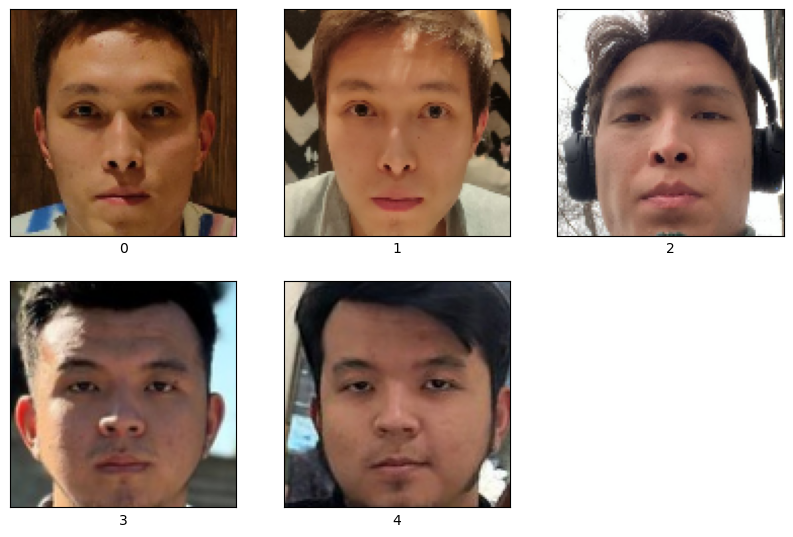

In [7]:
draw_images(images = [aligned1, aligned2, aligned3, aligned4, aligned5], image_num=5, read_images=False)

In [8]:
sim12 = cosine_simularity(embed1, embed2)
sim13 = cosine_simularity(embed1, embed3)
sim23 = cosine_simularity(embed2, embed3)

sim45 = cosine_simularity(embed4, embed5)

print(sim12[0][0])
print(sim13[0][0])
print(sim23[0][0])

print(sim45[0][0])

0.67880976
0.5502747
0.55854034
0.7027101


In [9]:
sim14 = cosine_simularity(embed1, embed4)
sim15 = cosine_simularity(embed1, embed5)
sim24 = cosine_simularity(embed2, embed5)
sim25 = cosine_simularity(embed2, embed4)
sim34 = cosine_simularity(embed3, embed4)
sim35 = cosine_simularity(embed3, embed5)

print(sim14[0][0])
print(sim15[0][0])

print(sim24[0][0])
print(sim25[0][0])

print(sim34[0][0])
print(sim35[0][0])

-0.034951285
-0.07085661
-0.04909934
-0.05785976
0.04804204
-0.017736228
